# Grid word (deterministic) using value iteration. greedy action policy. 

Notes:


*   our policy is to learn a mapping of state to value (estimated reward) and based on that estimation , at each state , our agent will choose the best action that gives the highest estimated reward.
*   we start by initializing all state values to 0 , until we end a game (win / lose state) , after that we update all state values and replay.



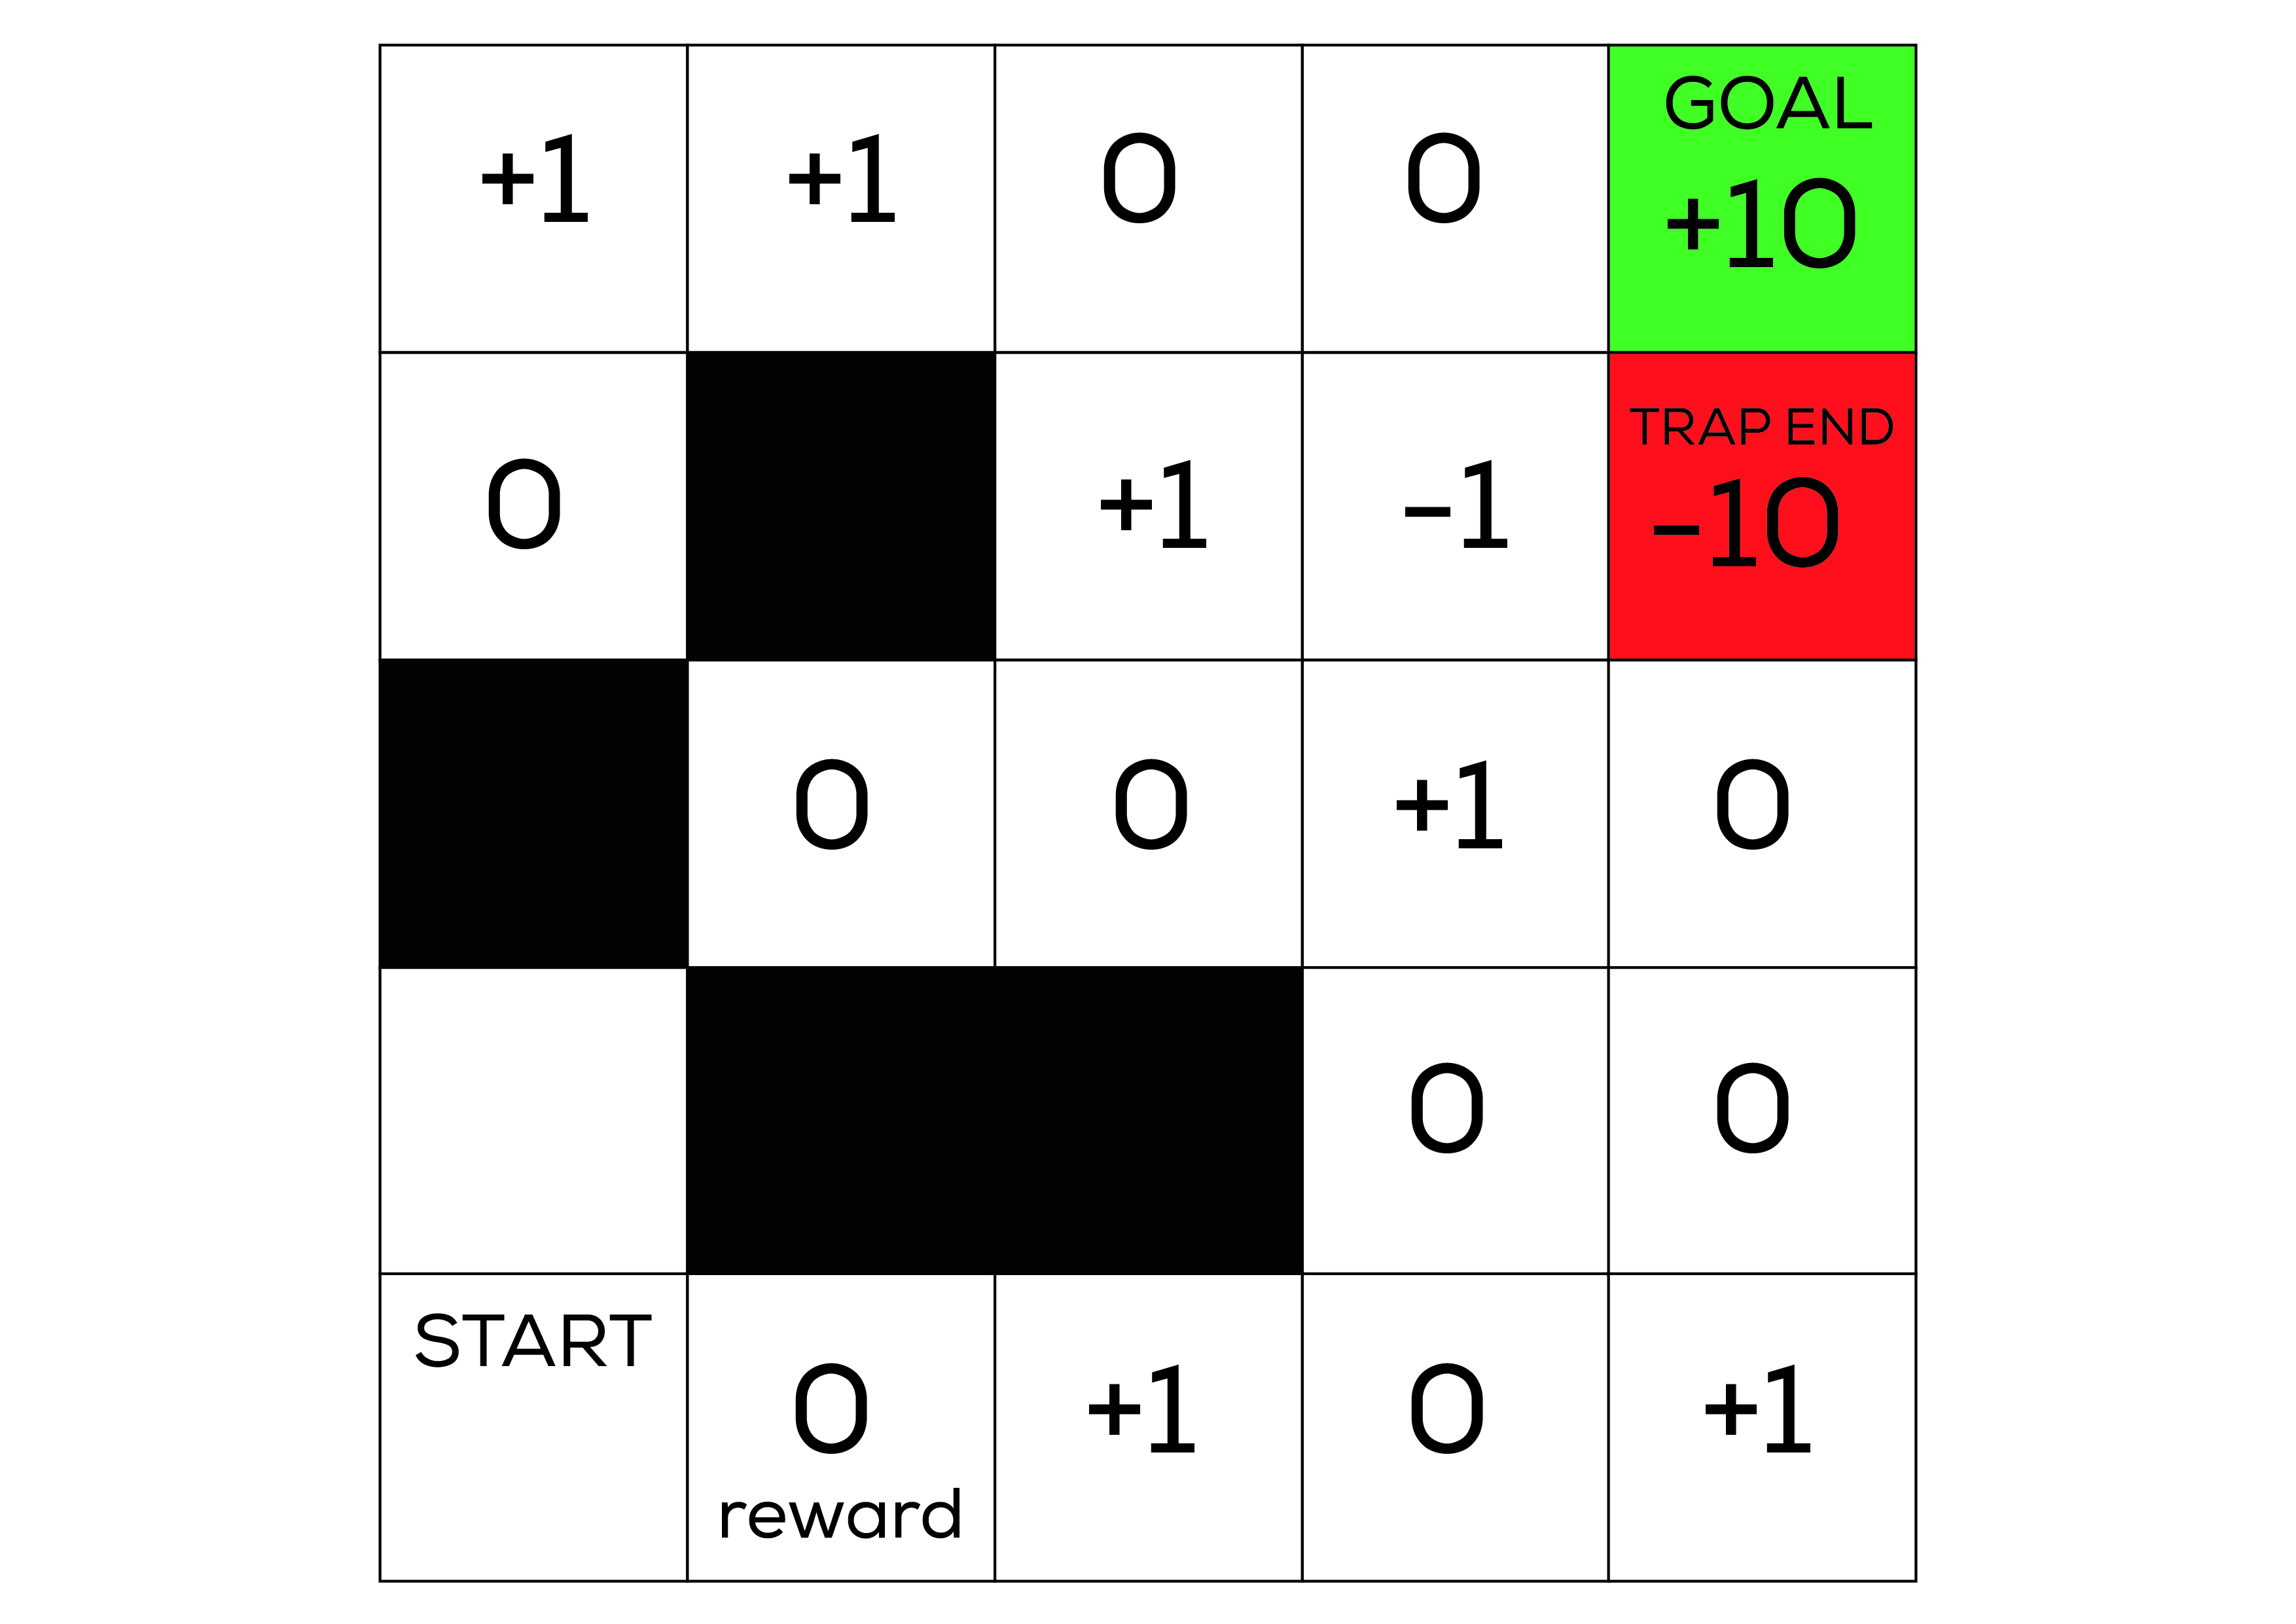

In [ ]:
import numpy as np

BOARD_ROWS = 5
BOARD_COLS = 5
WIN_STATE = (0, 4)
LOSE_STATE = (1, 4)
START = (4, 0)

1#environment: 
##giveReward->map rewards.
##isEndFunc->return Boolean if game is end.
##nxtPosition(action)->return state.
##showBoard.
class State:
    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        #self.board[1, 1] = -1
        self.state = state
        self.isEnd = False

    def giveReward(self):
        if self.state == WIN_STATE:
            return 10
        elif self.state == LOSE_STATE:
            return -10
        elif (self.state == (4,2)) or (self.state == (4,4)) or (self.state == (2,3)) or (self.state == (1,2)) :
            return 1
        elif (self.state == (1,3)) or (self.state == (0,1)):
            return -9
        else:
            return 0

    def isEndFunc(self):
        if (self.state == WIN_STATE) or (self.state == LOSE_STATE):
            self.isEnd = True

    def nxtPosition(self, action):
        if True:
            if action == "up":
                nxtState = (self.state[0] - 1, self.state[1])
            elif action == "down":
                nxtState = (self.state[0] + 1, self.state[1])
            elif action == "left":
                nxtState = (self.state[0], self.state[1] - 1)
            else:
                nxtState = (self.state[0], self.state[1] + 1)
            # if next state legal
            if (nxtState[0] >= 0) and (nxtState[0] <= (BOARD_ROWS -1)):
                if (nxtState[1] >= 0) and (nxtState[1] <= (BOARD_COLS -1)):
                    if (nxtState != (3, 1)) and (nxtState != (3, 2)) and (nxtState != (1, 1)) and (nxtState != (2, 0)) :
                        return nxtState
            return self.state

    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, BOARD_ROWS):
            print('-------------------------------------------------------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -1:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-----------------')


2#agent
##chooseAction->return action
##takeAction(action)->return state.
##reset.
##play : 1.chooseAction  2.takeAction  3.isEndFunc (if yes->update state values).
class Agent:
    def __init__(self):
        self.states = []
        self.actions = ["up", "down", "left", "right"]
        self.State = State()
        self.lr = 0.2
        self.exp_rate = 0.3

        # initial state values
        self.state_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.state_values[(i, j)] = 0  # set initial value to 0

    def chooseAction(self):
        # choose action with most expected value
        mx_nxt_reward = 0
        action = ""

        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            # greedy action
            for a in self.actions:
                nxt_reward = self.state_values[self.State.nxtPosition(a)]
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward
        return action

    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        return State(state=position)

    def reset(self):
        self.states = []
        self.State = State()

    def play(self, rounds=10):
        i = 0
        while i < rounds:
            #If End game , update all state values
            if self.State.isEnd:
                # back propagate
                reward = self.State.giveReward()
                print("Game End Reward", reward)
                #update state values
                for s in reversed(self.states):
                    reward = self.state_values[s] + self.lr * (reward - self.state_values[s])
                    self.state_values[s] = round(reward, 3)
                self.reset()
                i += 1
                print('***************************************************************************************************')
                print('round{}'.format(i))
                print('***************************************************************************************************')

            else: #we start with this part 
                action = self.chooseAction()
                # append trace
                self.states.append(self.State.nxtPosition(action))
                print("current position {} action {}".format(self.State.state, action))
                #next state
                self.State = self.takeAction(action)
                #test if End game
                self.State.isEndFunc()
                print("nxt state", self.State.state)
                print("-------------------------------")

    def showValues(self):
        for i in range(0, BOARD_ROWS):
            print('----------------------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                out += str(self.state_values[(i, j)]).ljust(6) + ' | '
            print(out)
        print('----------------------------------------------')
        print('/////////////////////')
        print('End GAME')
        print('/////////////////////')


if __name__ == "__main__":
    ag = Agent()
    ag.play(200)
    print(ag.showValues())

Streaming output truncated to the last 5000 lines.
nxt state (4, 4)
-------------------------------
current position (4, 4) action left
nxt state (4, 3)
-------------------------------
current position (4, 3) action up
nxt state (3, 3)
-------------------------------
current position (3, 3) action up
nxt state (2, 3)
-------------------------------
current position (2, 3) action left
nxt state (2, 2)
-------------------------------
current position (2, 2) action down
nxt state (2, 2)
-------------------------------
current position (2, 2) action up
nxt state (1, 2)
-------------------------------
current position (1, 2) action up
nxt state (0, 2)
-------------------------------
current position (0, 2) action right
nxt state (0, 3)
-------------------------------
current position (0, 3) action right
nxt state (0, 4)
-------------------------------
Game End Reward 10
***************************************************************************************************
round162
*************